# Homework 1

## FINM 36700 - 2023

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

## HBS Case

### *The Harvard Management Company and Inflation-Indexed Bonds*

### Notation
(Hidden LaTeX commands)

$$\newcommand{\mux}{\tilde{\boldsymbol{\mu}}}$$
$$\newcommand{\wtan}{\boldsymbol{\text{w}}^{\text{tan}}}$$
$$\newcommand{\wtarg}{\boldsymbol{\text{w}}^{\text{port}}}$$
$$\newcommand{\mutarg}{\tilde{\boldsymbol{\mu}}^{\text{port}}}$$
$$\newcommand{\wEW}{\boldsymbol{\text{w}}^{\text{EW}}}$$
$$\newcommand{\wRP}{\boldsymbol{\text{w}}^{\text{RP}}}$$
$$\newcommand{\wREG}{\boldsymbol{\text{w}}^{\text{REG}}}$$

***

# 1. HMC's Approach

**Section 1 is not graded**, and you do not need to submit your answers. But you are encouraged to think about them, and we will discuss them.

### 1. 
There are thousands of individual risky assets in which HMC can invest.  Explain why MV optimization across 1,000 securities is infeasible.



### 2.
Rather than optimize across all securities directly, HMC runs a two-stage optimization.
1. They build asset class portfolios with each one optimized over the securities of the specific asset class.  
2. HMC combines the asset-class portfolios into one total optimized portfolio.

In order for the two-stage optimization to be a good approximation of the full MV-optimization on all assets, what must be true of the partition of securities into asset classes?

### 3.
Should TIPS form a new asset class or be grouped into one of the other 11 classes?

### 4. 
Why does HMC focus on real returns when analyzing its portfolio allocation? Is this just a matter of scaling, or does using real returns versus nominal returns potentially change the MV solution?

### 5.
The case discusses the fact that Harvard places bounds on the portfolio allocation rather than implementing whatever numbers come out of the MV optimization problem.

How might we adjust the stated optimization problem in the lecture notes to reflect the extra constraints Harvard is using in their bounded solutions given in Exhibits 5 and 6. Just consider how we might rewrite the optimization; don’t try to solve this extra-constrained optimization.

### 6. 
Exhibits 5 shows zero allocation to domestic equities and domestic bonds across the entire computed range of targeted returns, (5.75% to 7.25%). Conceptually, why is the constraint binding in all these cases? What would the unconstrained portfolio want to do with those allocations and why?

### 7.
Exhibit 6 changes the constraints, (tightening them in most cases.) How much deterioration do we see in the mean-variance tradeoff that Harvard achieved?

***

# 2 Mean-Variance Optimization

<i>This section is graded for a good-faith effort by your group. Submit your write-up- along with your supporting code. 
    
    Don't just submit code or messy numbers; submit a coherent write-up based on your work.</i>

### Data
You will need the file in the github repo, `data/multi_asset_etf_data.xlsx`.
- The time-series data gives monthly returns for the 11 asset classes and a short-term Treasury-bill fund return, ("SHV",) which we consider as the risk-free rate.
- The data is provided in total returns, (in which case you should ignore the SHV column,) as well as excess returns, (where SHV has been subtracted from the other columns.)
- These are nominal returns-they are not adjusted for inflation, and in our calculations we are not making any adjustment for inflation.
- The exhibit data that comes via Harvard with the case is unnecessary for our analysis.

### Model
We are going to analyze the problem in terms of **excess** returns.
- Thus, you will focus on the `Excess Returns` section of the lecture notes, especially the formulas on slide 50.
- Be sure to use the`excess returns` tab of the data.

### Format
In the questions below, **annualize the statistics** you report.
- Annualize the mean of monthly returns with a scaling of 12.
- Annualize the volatility of monthly returns with a scaling of $\sqrt{12}$
- The Sharpe Ratio is the mean return divided by the volatility of returns. Accordingly, we can annualize the Sharpe Ratio with a scaling of $\sqrt{12}$
- Note that we are not scaling the raw timeseries data, just the statistics computed from it (mean, vol, Sharpe). 

### Footnotes

#### Data File
* The case does not give time-series data, so this data has been compiled outside of the case, and it intends to represent the main asset classes under consideration via various ETFs. For details on the specific securities/indexes, check the “Info” tab of the data.

#### Risk-free rate
* In the lecture-note we considered a constant risk-free rate. It is okay that our risk-free rate changes over time, but the assumption is that investors know it’s value one-period ahead of time. Thus, at any given point in time, it is a risk-free rate for the next period. (This is often discussed as the "bank account" or "money market account" in other settings.

## 1. Summary Statistics
* Calculate and display the mean and volatility of each asset’s excess return. (Recall we use volatility to refer to standard deviation.)
* Which assets have the best and worst Sharpe ratios? Recall that the Sharpe Ratio is simply the ratio of the mean-to-volatility of excess returns:
$$\text{sharpe ratio of investment }i = \frac{\mux_i}{\sigma_i}$$



In [3]:
import math
import pandas as pd
import numpy as np
pd.options.display.float_format = "{:,.4f}".format

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel('/Users/yiningqu/Desktop/研究生/36700 - Portfolio and Risk Management/multi_asset_etf_data.xlsx', sheet_name='excess returns', index_col='Date')
mean_returns = df.mean()
annualized_mean = mean_returns * 12
print('Mean\n', annualized_mean)

Mean
 BWX   -0.0018
DBC    0.0254
EEM    0.0649
EFA    0.0816
HYG    0.0642
IEF    0.0143
IYR    0.1295
PSP    0.0799
QAI    0.0190
SPY    0.1437
TIP    0.0223
dtype: float64


In [4]:
vol_returns = df.std()
annualized_vol = vol_returns * math.sqrt(12)
print('Volatility\n', annualized_vol)

Volatility
 BWX   0.0834
DBC   0.1790
EEM   0.1965
EFA   0.1660
HYG   0.0892
IEF   0.0624
IYR   0.1871
PSP   0.2274
QAI   0.0508
SPY   0.1477
TIP   0.0515
dtype: float64


In [5]:
sharpe_ratio = annualized_mean/ annualized_vol
sr_array = np.array(sharpe_ratio)
print('Sharpe Ratio\n', sharpe_ratio)
sr_max = df.columns[np.argmax(sr_array)]
sr_min = df.columns[np.argmin(sr_array)]
print('Asset class with highest sharpe ratio is ', sr_max)
print('Asset class with lowest sharpe ratio is ', sr_min)

Sharpe Ratio
 BWX   -0.0221
DBC    0.1422
EEM    0.3302
EFA    0.4916
HYG    0.7197
IEF    0.2287
IYR    0.6920
PSP    0.3516
QAI    0.3734
SPY    0.9732
TIP    0.4332
dtype: float64
Asset class with highest sharpe ratio is  SPY
Asset class with lowest sharpe ratio is  BWX


# 2. Descriptive Analysis
* Calculate the correlation matrix of the returns. Which pair has the highest correlation? And the lowest?
* How well have TIPS done in our sample? Have they outperformed domestic bonds? Foreign bonds?



<Axes: >

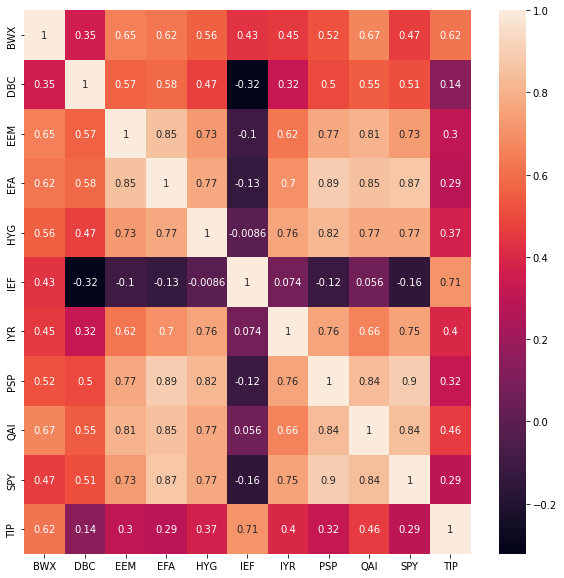

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, 
        xticklabels=corr_matrix.columns,
        yticklabels=corr_matrix.columns, annot=True)

In [7]:
stacked_corr = corr_matrix.stack()
highest_pair = stacked_corr.nlargest(12)
lowest_pair = stacked_corr.idxmin()
print('The highest correlation pair is ', highest_pair.index[11])
print('The highest correlation pair is ', lowest_pair)

The highest correlation pair is  ('PSP', 'SPY')
The highest correlation pair is  ('DBC', 'IEF')


# 3. The MV frontier.
* Compute and display the weights of the tangency portfolios: $\wtan$.
* Does the ranking of weights align with the ranking of Sharpe ratios?
* Compute the mean, volatility, and Sharpe ratio for the tangency portfolio corresponding to
$\wtan$.



In [19]:
cov_matrix = df.cov()
inv_cov = np.linalg.inv(cov_matrix)
mean = np.array(annualized_mean)
n_1 = np.transpose(np.ones(11))
w_tan = (1/(n_1@inv_cov@mean))*(inv_cov@mean)
w_tan_summary = pd.DataFrame(np.array([w_tan,sr_array]).T, columns= ["Tangent Weight","Sharpe Ratio"], index= df.columns)
w_tan_summary

,Tangent Weight,Sharpe Ratio
BWX,-1.4650,-0.0221
DBC,0.0284,0.1422
EEM,0.2610,0.3302
EFA,0.4529,0.4916
HYG,1.5289,0.7197
IEF,1.8940,0.2287
IYR,-0.2428,0.6920
PSP,-1.2711,0.3516
QAI,-3.1334,0.3734
SPY,2.5900,0.9732


In [20]:
w_tan_mean = np.transpose(w_tan)@mean
print('Mean of tangency portfolio :', w_tan_mean)

w_tan_vol = math.sqrt(np.transpose(w_tan)@cov_matrix@w_tan) * math.sqrt(12)
print('Volatility of tangency portfolio :', w_tan_vol)

w_tan_sr = w_tan_mean/w_tan_vol
print('Sharpe ratio of tangency portfolio :', w_tan_sr)

Mean of tangency portfolio : 0.3701800531275157
Volatility of tangency portfolio : 0.19152287863757664
Sharpe ratio of tangency portfolio : 1.9328241918711775


# 4. TIPS
Assess how much the tangency portfolio (and performance) change if...
* TIPS are dropped completely from the investment set.
* The expected excess return to TIPS is adjusted to be 0.0012 higher than what the historic sample shows.

Based on the analysis, do TIPS seem to expand the investment opportunity set, implying that Harvard should consider them as a separate asset?

In [28]:
df_1 = df.drop('TIP', axis = 1)
cov_matrix1 = df_1.cov()
inv_cov1 = np.linalg.inv(cov_matrix1)
mean_returns_1 = df_1.mean()
annualized_mean1 = mean_returns_1 * 12
mean_1 = np.array(annualized_mean1)
n_2 = np.transpose(np.ones(10))
w_tan1 = (1/((n_2@inv_cov1)@mean_1))*(inv_cov1@mean_1)

w_tan_summary2 = pd.DataFrame(np.array([w_tan1,w_tan[:-1]]).T, columns= ["Tangent Weight without TIPS","Tangent Weight with TIPS"], index= df_1.columns)
w_tan_summary2

,Tangent Weight without TIPS,Tangent Weight with TIPS
BWX,-1.5127,-1.4650
DBC,0.0552,0.0284
EEM,0.2781,0.2610
EFA,0.4415,0.4529
HYG,1.5931,1.5289
IEF,2.2125,1.8940
IYR,-0.2459,-0.2428
PSP,-1.3141,-1.2711
QAI,-3.2390,-3.1334
SPY,2.7314,2.5900


In [27]:

w_tan1_mean = np.transpose(w_tan1)@mean_1
print('Mean of tangency portfolio :', w_tan1_mean)

w_tan1_vol = math.sqrt(np.transpose(w_tan1)@cov_matrix1@w_tan1) * math.sqrt(12)
print('Volatility of tangency portfolio :', w_tan1_vol)

w_tan1_sr = w_tan1_mean/w_tan1_vol
print('Sharpe ratio of tangency portfolio :', w_tan1_sr)



Mean of tangency portfolio : 0.38629081629010487
Volatility of tangency portfolio : 0.20011098937644062
Sharpe ratio of tangency portfolio : 1.930382821522262


In [30]:
df2 = df.copy()
df2["TIP"] = df2["TIP"] + 0.0012
cov_matrix = df2.cov()
inv_cov = np.linalg.inv(cov_matrix)
mean_returns = df2.mean()
annualized_mean = mean_returns * 12
mean = np.array(annualized_mean)
n_1 = np.transpose(np.ones(11))
w_tan2 = (1/(n_1@inv_cov@mean))*(inv_cov@mean)

w_tan_summary3 = pd.DataFrame(np.array([w_tan[:-1],w_tan1,w_tan2[:-1]]).T, columns= ["Tangent Weight with TIPS","Tangent Weight without TIPS","Tangent Weight with Adjusted TIPS"], index= df_1.columns)
w_tan_summary3

,Tangent Weight with TIPS,Tangent Weight without TIPS,Tangent Weight with Adjusted TIPS
BWX,-1.4650,-1.5127,-1.2629
DBC,0.0284,0.0552,-0.0846
EEM,0.2610,0.2781,0.1889
EFA,0.4529,0.4415,0.5012
HYG,1.5289,1.5931,1.2574
IEF,1.8940,2.2125,0.5468
IYR,-0.2428,-0.2459,-0.2296
PSP,-1.2711,-1.3141,-1.0890
QAI,-3.1334,-3.2390,-2.6871
SPY,2.5900,2.7314,1.9920


In [31]:
w_tan2_mean = np.transpose(w_tan2)@mean
print('Mean of tangency portfolio :', w_tan2_mean)

w_tan2_vol = math.sqrt(np.transpose(w_tan2)@cov_matrix@w_tan2) * math.sqrt(12)
print('Volatility of tangency portfolio :', w_tan2_vol)

w_tan2_sr = w_tan2_mean/w_tan2_vol
print('Sharpe ratio of tangency portfolio :', w_tan2_sr)

Mean of tangency portfolio : 0.3289084045946136
Volatility of tangency portfolio : 0.16194669293062094
Sharpe ratio of tangency portfolio : 2.0309670956696855


# Conclusions on TIPS

* Dropping TIPS from the investment set barely impacts the weights or the resulting performance.
* Adjusting the mean of TIPS upward even just 1 standard error substantially impacts the allocations and moderately boosts the resulting performance.

Based on just a mean-variance analysis, it seems one could reasonably go either way with TIPS as an alternate asset class. In the argument to keep it separate, there is more diversification between TIPS and bonds than between SPY and many other equity buckets Harvard has. On the other hand, TIPS mostly impact the allocation to domestic bonds and might be seen as another asset in that bucket.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/Users/yiningqu/Desktop/multi_asset_etf_data.xlsx')
df

***

# 3. Allocations

<i>This section is graded for a good-faith effort by your group. Submit your write-up- along with your supporting code.

* Continue with the same data file as the previous section.

* Suppose the investor has a targeted mean excess return (per month) of $\mutarg$ = 0.01.

Build the following portfolios:

#### Equally-weighted (EW)
Rescale the entire weighting vector to have target mean $\mutarg$. Thus, the $i$ element of the weight vector is,
$$\wEW_i = \frac{1}{n}$$

#### “Risk-parity” (RP)
Risk-parity is a term used in a variety of ways, but here we have in mind setting the weight of the portfolio to be proportional to the inverse of its full-sample variance estimate. Thus, the $i$ element of the weight vector is,
$$\wRP_i = \frac{1}{\sigma_i^2}$$

#### Regularized (REG)
Much like the Mean-Variance portfolio, set the weights proportional to 
$$\wREG \sim \widehat{\Sigma}^{-1}\mux$$
but this time, use a regularized covariance matrix,
$$\widehat{\Sigma} = \frac{\Sigma + \Sigma_D}{2}$$
where $\Sigma_D$ denotes a *diagonal* matrix of the security variances, with zeros in the off-diagonals.

Thus, $\widehat{\Sigma}$ is obtained from the usual covariance matrix, $\Sigma$, but shrinking all the covariances to half their estimated values. 


### Comparing

In order to compare all these allocation methods, (those above, along with the tangency portfolio obtained in the previous section,) rescale each weight vector, such that it has targeted mean return of $\mutarg$.

* Calculate the performance of each of these portfolios over the sample.
* Report their mean, volatility, and Sharpe ratio. 
* How do these compare across the four allocation methods?

In [32]:
import math
import pandas as pd
import numpy as np
df = pd.read_excel('/Users/yiningqu/Desktop/研究生/36700 - Portfolio and Risk Management/multi_asset_etf_data.xlsx')
excess_ret = pd.read_excel('/Users/yiningqu/Desktop/研究生/36700 - Portfolio and Risk Management/multi_asset_etf_data.xlsx',sheet_name = 'excess returns', index_col = 'Date')
ret = pd.read_excel('/Users/yiningqu/Desktop/研究生/36700 - Portfolio and Risk Management/multi_asset_etf_data.xlsx',sheet_name = 'total returns', index_col = 'Date')


In [33]:
target_mean = 0.01 * 12

In [63]:
#Equally-weighted (EW)
ew = pd.DataFrame()
weight1 = np.full((excess_ret.shape[1],1), 1/excess_ret.shape[1])
#np.full((number of rows, number of columns),each entry value)
mean = weight1.T @ np.array(excess_ret.mean() * 12)

variance = weight1.T @ excess_ret.cov() @ weight1

vol = math.sqrt(variance.iloc[0, 0]) *math.sqrt(12)

sharpe_ratio = mean / vol

rescale1 = target_mean / mean

ew['mean'] = mean * rescale1
ew['volatility'] = vol * rescale1
ew['sharpe ratio'] = sharpe_ratio
ew.index = ['Equally weighted']
ew

,mean,volatility,sharpe ratio
Equally weighted,0.1200,0.2133,0.5627


In [55]:
# “Risk-parity” (RP)
rp = pd.DataFrame()
weight_array = np.array(1/excess_ret.std()**2)
scale = 1/weight_array.sum()
weight2 = np.array(scale/excess_ret.std()**2)

mean = weight2.T @ np.array(excess_ret.mean() * 12)

variance = weight2.T @ excess_ret.cov() @ weight2

vol = math.sqrt(variance) *math.sqrt(12)

sharpe_ratio = mean / vol

rescale1 = target_mean / mean

rp['mean'] = [mean]
rp['volatility'] = [vol] 
rp['sharpe ratio'] = [sharpe_ratio]
rp.index = ['Risk-parity']
rp

0.030114762305211918
0.000248697687040583


,mean,volatility,sharpe ratio
Risk-parity,0.0301,0.0546,0.5513


In [61]:
#Regularized (REG)
reg = pd.DataFrame()

cov_matrix = np.array(excess_ret.cov()) 
sigma_d = np.diag(np.diag(cov_matrix))
matrix = (cov_matrix + sigma_d)/2
weight3 = np.linalg.inv(matrix) @ np.array(excess_ret.mean() * 12)
scale = 1/weight3.sum()
weight_reg = (weight3 * scale)

mean = weight_reg.T @ np.array(excess_ret.mean() * 12) 

variance = weight_reg.T @ excess_ret.cov() @ weight_reg
vol = math.sqrt(variance) *math.sqrt(12)

sharpe_ratio = mean / vol

rescale2 = target_mean / mean

reg['mean'] = [mean * rescale2]
reg['volatility'] = [vol * rescale2]
reg['sharpe ratio'] = [sharpe_ratio]
reg.index = ['Regularized']
reg



,mean,volatility,sharpe ratio
Regularized,0.1200,0.0941,1.2753


***

# 4. Out-of-Sample Performance

<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

## 1. One-step Out-of-Sample (OOS) Performance
Let’s divide the sample to both compute a portfolio and then check its performance out of sample.
* Using only data through the end of 2021, compute the weights built in Section 3.
* Rescale the weights, (using just the in-sample data,) to set each allocation to have the same mean return of $\mutarg$.
* Using those weights, calculate the portfolio’s Sharpe ratio within that sample.
* Again using those weights, (derived using data through 2021,) calculate the portfolio’s OOS Sharpe ratio, which is based only on performance in 2022-2023.

## 2. Rolling OOS Performance

Iterate the Out-of-Sample performance every year, not just the final year. Namely,
* Start at the end of 2014, and calculate the weights through that time. Rescale them using the mean returns through that time.
* Apply the weights to the returns in the upcoming year, (2015.)
* Step forward a year in time, and recompute.
* Continue until again calculating the weights through 2022 and applying them to the returns in 2023.

Report the mean, volatility, and Sharpe from this dynamic approach for the following portfolios:
* mean-variance (tangency)
* equally-weighted
* risk-parity
* regularized

***

# 5. Without a Riskless Asset

<i>This section is not graded, and you do not need to submit it. Still, we may discuss it in class, in which case, you would be expected to know it.

Re-do Section 2 above, but in the model without a risk-free rate.

That is, build the MV allocation using the two-part formula in the `Mean-Variance` section of the notes.
* This essentially substitutes the risk-free rate with the minimum-variance portfolio.
* Now, the allocation depends nonlinearly on the target mean return, $\mutarg$. (With a risk-free rate, we simply scale the weights up and down to achieve the mean return.)

You will find that, conceptually, the answers are very similar. 

***